# Predicting a measure of wealth for different locations across Africa


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train=pd.read_csv('Train.csv')
test=pd.read_csv('Test.csv')

In [3]:
s = (train.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['ID', 'country', 'urban_or_rural']


In [4]:
label_X_train = train.copy()
from sklearn.preprocessing import LabelEncoder
# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for col in object_cols:
    label_X_train[col] = label_encoder.fit_transform(train[col])
    print (label_X_train[col])

0            0
1            1
2            2
3            3
4            4
         ...  
21449    21449
21450    21450
21451    21451
21452    21452
21453    21453
Name: ID, Length: 21454, dtype: int32
0         3
1         3
2        10
3         8
4         5
         ..
21449    11
21450    13
21451     4
21452     4
21453    10
Name: country, Length: 21454, dtype: int32
0        0
1        0
2        0
3        0
4        1
        ..
21449    0
21450    0
21451    0
21452    0
21453    0
Name: urban_or_rural, Length: 21454, dtype: int32


In [5]:
label_X_train

,ID,country,year,urban_or_rural,ghsl_water_surface,ghsl_built_pre_1975,ghsl_built_1975_to_1990,ghsl_built_1990_to_2000,ghsl_built_2000_to_2014,ghsl_not_built_up,ghsl_pop_density,landcover_crops_fraction,landcover_urban_fraction,landcover_water_permanent_10km_fraction,landcover_water_seasonal_10km_fraction,nighttime_lights,dist_to_capital,dist_to_shoreline,Target
0,0,3,2016,0,0.0,0.000000,0.000000,0.000055,0.000536,0.999408,12.146134,25.489659,0.879484,0.000000,0.000000,0.000000,278.788451,769.338378,0.132783
1,1,3,2005,0,0.0,0.000000,0.000110,0.000000,0.000018,0.999872,113.806716,64.136053,0.601427,0.000000,0.005427,0.000000,200.986978,337.135243,0.004898
2,2,10,2009,0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.400096,0.131900,0.000000,0.003078,0.000000,642.594208,169.913773,0.097320
3,3,8,2015,0,0.0,0.000141,0.000181,0.000254,0.000228,0.999195,5.213320,25.379371,2.017136,11.293841,0.131035,0.000000,365.349451,613.591610,0.304107
4,4,5,2012,1,0.0,0.011649,0.017560,0.017383,0.099875,0.853533,31.734661,5.081620,22.815984,0.005047,0.130475,1.461894,222.867189,192.926363,0.605328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21449,21449,11,2013,0,0.0,0.002961,0.008240,0.002313,0.008068,0.978418,44.044352,12.551978,6.302902,0.000000,0.000000,1.955632,283.861037,159.790057,0.624088
21450,21450,13,2011,0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,27.848571,0.372267,0.000000,0.000000,0.000000,295.307249,122.976960,0.250042
21451,21451,4,2014,0,0.0,0.000536,0.000092,0.000018,0.000074,0.999279,0.458143,3.679934,1.712136,0.000000,0.000000,0.442422,166.405249,155.365355,0.314871
21452,21452,4,2014,0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,12.331763,0.960163,0.001899,0.061126,0.000000,568.759665,534.638628,0.237831


In [6]:
label_X_train.drop(columns=['ID'])

,country,year,urban_or_rural,ghsl_water_surface,ghsl_built_pre_1975,ghsl_built_1975_to_1990,ghsl_built_1990_to_2000,ghsl_built_2000_to_2014,ghsl_not_built_up,ghsl_pop_density,landcover_crops_fraction,landcover_urban_fraction,landcover_water_permanent_10km_fraction,landcover_water_seasonal_10km_fraction,nighttime_lights,dist_to_capital,dist_to_shoreline,Target
0,3,2016,0,0.0,0.000000,0.000000,0.000055,0.000536,0.999408,12.146134,25.489659,0.879484,0.000000,0.000000,0.000000,278.788451,769.338378,0.132783
1,3,2005,0,0.0,0.000000,0.000110,0.000000,0.000018,0.999872,113.806716,64.136053,0.601427,0.000000,0.005427,0.000000,200.986978,337.135243,0.004898
2,10,2009,0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.400096,0.131900,0.000000,0.003078,0.000000,642.594208,169.913773,0.097320
3,8,2015,0,0.0,0.000141,0.000181,0.000254,0.000228,0.999195,5.213320,25.379371,2.017136,11.293841,0.131035,0.000000,365.349451,613.591610,0.304107
4,5,2012,1,0.0,0.011649,0.017560,0.017383,0.099875,0.853533,31.734661,5.081620,22.815984,0.005047,0.130475,1.461894,222.867189,192.926363,0.605328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21449,11,2013,0,0.0,0.002961,0.008240,0.002313,0.008068,0.978418,44.044352,12.551978,6.302902,0.000000,0.000000,1.955632,283.861037,159.790057,0.624088
21450,13,2011,0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,27.848571,0.372267,0.000000,0.000000,0.000000,295.307249,122.976960,0.250042
21451,4,2014,0,0.0,0.000536,0.000092,0.000018,0.000074,0.999279,0.458143,3.679934,1.712136,0.000000,0.000000,0.442422,166.405249,155.365355,0.314871
21452,4,2014,0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,12.331763,0.960163,0.001899,0.061126,0.000000,568.759665,534.638628,0.237831


In [7]:
label_X_train['year'] = label_X_train['year'].astype('category',copy=False)


In [8]:
label_X_train['year'] = label_encoder.fit_transform(train['year'])


In [9]:
label_X_train['year'] 

0        18
1         7
2        11
3        17
4        14
         ..
21449    15
21450    13
21451    16
21452    16
21453    13
Name: year, Length: 21454, dtype: int64

In [10]:
target=label_X_train['Target']

C:\Users\BELLO FAHEEDAH\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


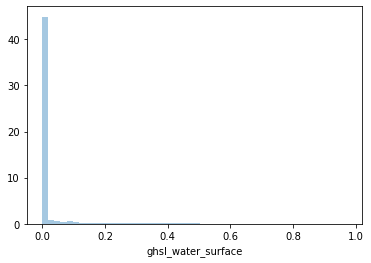

In [11]:
#checking the distributions 
sns.distplot(label_X_train['ghsl_water_surface'])

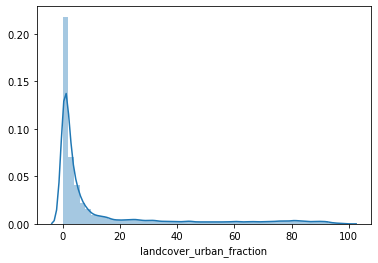

In [12]:
sns.distplot(label_X_train['landcover_urban_fraction'])

In [13]:
trainedColumns=['ghsl_water_surface', 'ghsl_built_pre_1975', 'ghsl_built_1975_to_1990', 'ghsl_built_1990_to_2000', 'ghsl_built_2000_to_2014', 'ghsl_not_built_up', 'ghsl_pop_density', 'landcover_crops_fraction', 'landcover_urban_fraction', 'landcover_water_permanent_10km_fraction', 'landcover_water_seasonal_10km_fraction', 'nighttime_lights', 'dist_to_capital', 'dist_to_shoreline','country','urban_or_rural']
for i in trainedColumns:
    transformed_sqrt=np.sqrt(label_X_train[i])
    transformed_log=np.log(10)(label_X_train[i])
    transformed_inv_sqrt=np.sqrt(label_X_train[i])**-1
    print(label_X_train[i].skew(),transformed_sqrt.skew(), transformed_log.skew(),transformed_inv_sqrt.skew())

TypeError: 'numpy.float64' object is not callable

In [15]:
trainedColumns=['ghsl_water_surface', 'ghsl_built_pre_1975', 'ghsl_built_1975_to_1990', 'ghsl_built_1990_to_2000', 'ghsl_built_2000_to_2014', 'ghsl_not_built_up', 'ghsl_pop_density', 'landcover_crops_fraction', 'landcover_urban_fraction', 'landcover_water_permanent_10km_fraction', 'landcover_water_seasonal_10km_fraction', 'nighttime_lights', 'dist_to_capital', 'dist_to_shoreline','country','urban_or_rural']
for i in trainedColumns:
    transformed_sqrt=np.sqrt(label_X_train[i])
    transformed_inv_sqrt=np.sqrt(label_X_train[i])**-1
    print(label_X_train[i].skew() ,transformed_sqrt.skew(), transformed_inv_sqrt.skew())

4.462054600420592 2.9888401667435334 nan
4.060006515513394 2.5189399366391942 nan
3.829905174291852 2.2673849248197953 nan
5.54422823516891 2.1423830116299043 nan
3.9858007893425293 1.7503439824198321 nan
-2.134892521616796 -2.646199749193698 12.338321573606235
3.6055605605251206 1.9343828797070661 nan
0.5628653104891809 -0.14662692566478536 nan
2.016125926917927 1.3311838017047184 nan
7.653752215693464 3.8498974940966506 nan
8.14779723144414 2.871384958449583 nan
3.7000204535199193 1.9765132909146577 nan
1.9713098933215178 0.16550292681277531 5.017157395896059
0.6249038963323098 -0.1363641723238637 4.147488254611267
0.026766786282324196 -1.008949281029619 nan
0.6540448045605628 0.6540448045605628 nan


In [16]:
label_X_train['ghsl_water_surface']=np.sqrt(train['ghsl_water_surface'])
label_X_train['ghsl_built_pre_1975']=np.sqrt(train['ghsl_built_pre_1975'])
label_X_train['ghsl_built_1975_to_1990']=np.sqrt(train['ghsl_built_1975_to_1990']) 
label_X_train['ghsl_built_1990_to_2000']=np.sqrt(train['ghsl_built_1990_to_2000'])
label_X_train['ghsl_built_2000_to_2014']=np.sqrt(train['ghsl_built_2000_to_2014'])
label_X_train['ghsl_not_built_up']=np.sqrt(train['ghsl_not_built_up'])
label_X_train['ghsl_pop_density']=np.sqrt(train['ghsl_pop_density'])
label_X_train['landcover_crops_fraction']=np.sqrt(train['landcover_crops_fraction']) 
label_X_train['landcover_urban_fraction']=np.sqrt(train['landcover_urban_fraction'])
label_X_train['landcover_water_permanent_10km_fraction']=np.sqrt(train['landcover_water_permanent_10km_fraction'])
label_X_train['landcover_water_seasonal_10km_fraction']=np.sqrt(train['landcover_water_seasonal_10km_fraction'])
label_X_train['nighttime_lights']=np.sqrt(train['nighttime_lights'])
label_X_train['dist_to_capital']=np.sqrt(train['dist_to_capital'])
label_X_train['dist_to_shoreline']=np.sqrt(train['dist_to_shoreline'])


In [17]:
label_X_train

,ID,country,year,urban_or_rural,ghsl_water_surface,ghsl_built_pre_1975,ghsl_built_1975_to_1990,ghsl_built_1990_to_2000,ghsl_built_2000_to_2014,ghsl_not_built_up,ghsl_pop_density,landcover_crops_fraction,landcover_urban_fraction,landcover_water_permanent_10km_fraction,landcover_water_seasonal_10km_fraction,nighttime_lights,dist_to_capital,dist_to_shoreline,Target
0,0,3,18,0,0.0,0.000000,0.000000,0.007449,0.023161,0.999704,3.485130,5.048728,0.937808,0.000000,0.000000,0.000000,16.696959,27.736950,0.132783
1,1,3,7,0,0.0,0.000000,0.010480,0.000000,0.004278,0.999936,10.668023,8.008499,0.775517,0.000000,0.073666,0.000000,14.176988,18.361243,0.004898
2,2,10,11,0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.097641,0.363181,0.000000,0.055479,0.000000,25.349442,13.035098,0.097320
3,3,8,17,0,0.0,0.011854,0.013466,0.015949,0.015111,0.999598,2.283270,5.037794,1.420259,3.360631,0.361988,0.000000,19.114117,24.770781,0.304107
4,4,5,14,1,0.0,0.107929,0.132516,0.131843,0.316030,0.923869,5.633353,2.254245,4.776608,0.071045,0.361214,1.209088,14.928737,13.889793,0.605328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21449,21449,11,15,0,0.0,0.054413,0.090777,0.048095,0.089823,0.989150,6.636592,3.542877,2.510558,0.000000,0.000000,1.398439,16.848176,12.640809,0.624088
21450,21450,13,13,0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,5.277175,0.610137,0.000000,0.000000,0.000000,17.184506,11.089498,0.250042
21451,21451,4,16,0,0.0,0.023160,0.009617,0.004301,0.008602,0.999639,0.676862,1.918315,1.308486,0.000000,0.000000,0.665148,12.899816,12.464564,0.314871
21452,21452,4,16,0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.511661,0.979879,0.043577,0.247237,0.000000,23.848683,23.122254,0.237831


In [22]:
X_train=label_X_train.iloc[:,1:18]
X_train

,country,year,urban_or_rural,ghsl_water_surface,ghsl_built_pre_1975,ghsl_built_1975_to_1990,ghsl_built_1990_to_2000,ghsl_built_2000_to_2014,ghsl_not_built_up,ghsl_pop_density,landcover_crops_fraction,landcover_urban_fraction,landcover_water_permanent_10km_fraction,landcover_water_seasonal_10km_fraction,nighttime_lights,dist_to_capital,dist_to_shoreline
0,3,18,0,0.0,0.000000,0.000000,0.007449,0.023161,0.999704,3.485130,5.048728,0.937808,0.000000,0.000000,0.000000,16.696959,27.736950
1,3,7,0,0.0,0.000000,0.010480,0.000000,0.004278,0.999936,10.668023,8.008499,0.775517,0.000000,0.073666,0.000000,14.176988,18.361243
2,10,11,0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.097641,0.363181,0.000000,0.055479,0.000000,25.349442,13.035098
3,8,17,0,0.0,0.011854,0.013466,0.015949,0.015111,0.999598,2.283270,5.037794,1.420259,3.360631,0.361988,0.000000,19.114117,24.770781
4,5,14,1,0.0,0.107929,0.132516,0.131843,0.316030,0.923869,5.633353,2.254245,4.776608,0.071045,0.361214,1.209088,14.928737,13.889793
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21449,11,15,0,0.0,0.054413,0.090777,0.048095,0.089823,0.989150,6.636592,3.542877,2.510558,0.000000,0.000000,1.398439,16.848176,12.640809
21450,13,13,0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,5.277175,0.610137,0.000000,0.000000,0.000000,17.184506,11.089498
21451,4,16,0,0.0,0.023160,0.009617,0.004301,0.008602,0.999639,0.676862,1.918315,1.308486,0.000000,0.000000,0.665148,12.899816,12.464564
21452,4,16,0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.511661,0.979879,0.043577,0.247237,0.000000,23.848683,23.122254


In [23]:
target

0        0.132783
1        0.004898
2        0.097320
3        0.304107
4        0.605328
           ...   
21449    0.624088
21450    0.250042
21451    0.314871
21452    0.237831
21453    0.165071
Name: Target, Length: 21454, dtype: float64

In [24]:
from xgboost import XGBRegressor
my_model= XGBRegressor(n_estimators=1000, learning_rate=0.05, n_jobs=4)
my_model.fit(X_train, target, verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [26]:
label_X_test = test.copy()
from sklearn.preprocessing import LabelEncoder
# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for col in object_cols:
    label_X_test[col] = label_encoder.fit_transform(test[col])
    print (label_X_test[col])

0          0
1          1
2          2
3          3
4          4
        ... 
7189    7189
7190    7190
7191    7191
7192    7192
7193    7193
Name: ID, Length: 7194, dtype: int32
0       3
1       3
2       4
3       2
4       5
       ..
7189    6
7190    4
7191    2
7192    6
7193    3
Name: country, Length: 7194, dtype: int32
0       0
1       1
2       1
3       1
4       0
       ..
7189    0
7190    1
7191    1
7192    0
7193    1
Name: urban_or_rural, Length: 7194, dtype: int32


In [27]:
label_X_test['year'] = label_X_test['year'].astype('category',copy=False)
label_X_test['year'] = label_encoder.fit_transform(test['year'])


In [28]:
label_X_test.drop(columns=['ID'])

,country,year,urban_or_rural,ghsl_water_surface,ghsl_built_pre_1975,ghsl_built_1975_to_1990,ghsl_built_1990_to_2000,ghsl_built_2000_to_2014,ghsl_not_built_up,ghsl_pop_density,landcover_crops_fraction,landcover_urban_fraction,landcover_water_permanent_10km_fraction,landcover_water_seasonal_10km_fraction,nighttime_lights,dist_to_capital,dist_to_shoreline
0,3,4,0,0.000000,0.000000,0.000000,0.000523,0.000131,0.999347,0.660758,0.990942,0.132264,0.069055,0.032627,0.000000,1249.294720,1364.592100
1,3,4,1,0.000000,0.004239,0.000238,0.001227,0.002860,0.991437,6.441547,5.461365,0.452400,0.000000,0.000000,0.000000,821.019579,1046.028681
2,4,7,1,0.007359,0.525682,0.132795,0.095416,0.042375,0.196373,587.516458,2.881811,87.387991,3.248483,3.950374,60.070041,3.620455,906.057334
3,2,6,1,0.000000,0.000089,0.000036,0.001519,0.001358,0.996997,35.141762,33.878927,4.166437,0.000000,0.130727,1.333999,109.493969,775.139189
4,5,4,0,0.000000,0.000138,0.000623,0.000615,0.002961,0.995663,3.442449,33.491994,3.437129,0.133563,0.128997,0.502203,133.643319,835.591501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7189,6,6,0,0.000000,0.000000,0.000000,0.000016,0.000131,0.999853,0.304446,32.263180,0.658724,0.000000,0.077742,0.103892,500.988790,703.139988
7190,4,7,1,0.000000,0.000056,0.000883,0.003861,0.002483,0.992717,36.160182,27.520555,3.615442,0.000000,0.001157,0.000000,159.587852,1000.194893
7191,2,6,1,0.002683,0.000268,0.002800,0.009322,0.042527,0.942399,46.127465,35.674511,12.705561,0.001129,0.723252,4.734974,33.775441,781.833777
7192,6,7,0,0.000332,0.000000,0.000017,0.000000,0.000100,0.999551,0.309696,18.050789,0.030514,0.033177,0.222629,0.175123,320.974153,605.920204


C:\Users\BELLO FAHEEDAH\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


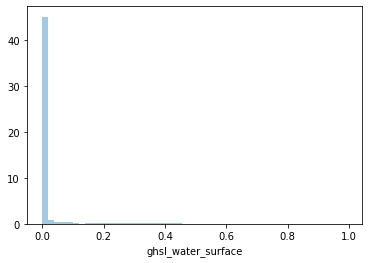

In [29]:
sns.distplot(label_X_test['ghsl_water_surface'])

In [30]:
label_X_test['ghsl_water_surface']=np.sqrt(test['ghsl_water_surface'])
label_X_test['ghsl_built_pre_1975']=np.sqrt(test['ghsl_built_pre_1975'])
label_X_test['ghsl_built_1975_to_1990']=np.sqrt(test['ghsl_built_1975_to_1990']) 
label_X_test['ghsl_built_1990_to_2000']=np.sqrt(test['ghsl_built_1990_to_2000'])
label_X_test['ghsl_built_2000_to_2014']=np.sqrt(test['ghsl_built_2000_to_2014'])
label_X_test['ghsl_not_built_up']=np.sqrt(test['ghsl_not_built_up'])
label_X_test['ghsl_pop_density']=np.sqrt(test['ghsl_pop_density'])
label_X_test['landcover_crops_fraction']=np.sqrt(test['landcover_crops_fraction']) 
label_X_test['landcover_urban_fraction']=np.sqrt(test['landcover_urban_fraction'])
label_X_test['landcover_water_permanent_10km_fraction']=np.sqrt(test['landcover_water_permanent_10km_fraction'])
label_X_test['landcover_water_seasonal_10km_fraction']=np.sqrt(test['landcover_water_seasonal_10km_fraction'])
label_X_test['nighttime_lights']=np.sqrt(test['nighttime_lights'])
label_X_test['dist_to_capital']=np.sqrt(test['dist_to_capital'])
label_X_test['dist_to_shoreline']=np.sqrt(test['dist_to_shoreline'])


In [31]:
label_X_test

,ID,country,year,urban_or_rural,ghsl_water_surface,ghsl_built_pre_1975,ghsl_built_1975_to_1990,ghsl_built_1990_to_2000,ghsl_built_2000_to_2014,ghsl_not_built_up,ghsl_pop_density,landcover_crops_fraction,landcover_urban_fraction,landcover_water_permanent_10km_fraction,landcover_water_seasonal_10km_fraction,nighttime_lights,dist_to_capital,dist_to_shoreline
0,0,3,4,0,0.000000,0.000000,0.000000,0.022864,0.011432,0.999673,0.812870,0.995461,0.363681,0.262782,0.180628,0.000000,35.345363,36.940386
1,1,3,4,1,0.000000,0.065104,0.015421,0.035023,0.053476,0.995709,2.538020,2.336956,0.672607,0.000000,0.000000,0.000000,28.653439,32.342367
2,2,4,7,1,0.085787,0.725039,0.364411,0.308895,0.205851,0.443140,24.238739,1.697590,9.348154,1.802355,1.987555,7.750486,1.902749,30.100786
3,3,2,6,1,0.000000,0.009453,0.005979,0.038978,0.036856,0.998497,5.928049,5.820561,2.041185,0.000000,0.361562,1.154989,10.463937,27.841322
4,4,5,4,0,0.000000,0.011762,0.024951,0.024792,0.054419,0.997829,1.855384,5.787227,1.853949,0.365462,0.359162,0.708663,11.560420,28.906600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7189,7189,6,6,0,0.000000,0.000000,0.000000,0.004039,0.011424,0.999927,0.551766,5.680069,0.811618,0.000000,0.278822,0.322323,22.382779,26.516787
7190,7190,4,7,1,0.000000,0.007506,0.029710,0.062141,0.049825,0.996352,6.013334,5.246004,1.901431,0.000000,0.034017,0.000000,12.632809,31.625858
7191,7191,2,6,1,0.051802,0.016381,0.052913,0.096550,0.206221,0.970773,6.791720,5.972814,3.564486,0.033607,0.850442,2.175999,5.811664,27.961291
7192,7192,6,7,0,0.018234,0.000000,0.004077,0.000000,0.009987,0.999776,0.556503,4.248622,0.174683,0.182145,0.471836,0.418477,17.915752,24.615446


In [32]:
X_test=label_X_test.iloc[:,1:18]

In [33]:
X_test

,country,year,urban_or_rural,ghsl_water_surface,ghsl_built_pre_1975,ghsl_built_1975_to_1990,ghsl_built_1990_to_2000,ghsl_built_2000_to_2014,ghsl_not_built_up,ghsl_pop_density,landcover_crops_fraction,landcover_urban_fraction,landcover_water_permanent_10km_fraction,landcover_water_seasonal_10km_fraction,nighttime_lights,dist_to_capital,dist_to_shoreline
0,3,4,0,0.000000,0.000000,0.000000,0.022864,0.011432,0.999673,0.812870,0.995461,0.363681,0.262782,0.180628,0.000000,35.345363,36.940386
1,3,4,1,0.000000,0.065104,0.015421,0.035023,0.053476,0.995709,2.538020,2.336956,0.672607,0.000000,0.000000,0.000000,28.653439,32.342367
2,4,7,1,0.085787,0.725039,0.364411,0.308895,0.205851,0.443140,24.238739,1.697590,9.348154,1.802355,1.987555,7.750486,1.902749,30.100786
3,2,6,1,0.000000,0.009453,0.005979,0.038978,0.036856,0.998497,5.928049,5.820561,2.041185,0.000000,0.361562,1.154989,10.463937,27.841322
4,5,4,0,0.000000,0.011762,0.024951,0.024792,0.054419,0.997829,1.855384,5.787227,1.853949,0.365462,0.359162,0.708663,11.560420,28.906600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7189,6,6,0,0.000000,0.000000,0.000000,0.004039,0.011424,0.999927,0.551766,5.680069,0.811618,0.000000,0.278822,0.322323,22.382779,26.516787
7190,4,7,1,0.000000,0.007506,0.029710,0.062141,0.049825,0.996352,6.013334,5.246004,1.901431,0.000000,0.034017,0.000000,12.632809,31.625858
7191,2,6,1,0.051802,0.016381,0.052913,0.096550,0.206221,0.970773,6.791720,5.972814,3.564486,0.033607,0.850442,2.175999,5.811664,27.961291
7192,6,7,0,0.018234,0.000000,0.004077,0.000000,0.009987,0.999776,0.556503,4.248622,0.174683,0.182145,0.471836,0.418477,17.915752,24.615446


In [35]:
result = pd.read_csv('SampleSubmission.csv')
result['Target'] = my_model.predict(X_test) 
result.head()

,ID,Target
0,ID_AAcismbB,0.090306
1,ID_AAeBMsji,0.173097
2,ID_AAjFMjzy,0.561090
3,ID_AAmMOEEC,0.332640
4,ID_ABguzDxp,0.246418


In [36]:
result.to_csv('zindi_result.csv', index=False)